# XGBoost

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np


print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"numpy version: {np.__version__}")

import sklearn
print(f"sklearn version: {sklearn.__version__}")

import xgboost
print(f"xgboost version: {xgboost.__version__}")

import sys
print(f"Python version: {sys.version}")

pandas version: 2.2.3
matplotlib version: 3.9.2
seaborn version: 0.13.2
numpy version: 1.23.5
sklearn version: 1.5.2
xgboost version: 2.1.1
Python version: 3.9.18 (main, Sep 11 2023, 08:16:19) 
[Clang 14.0.6 ]


### Import data

In [2]:
players_all = pd.read_csv('../games_by_players_all.csv', encoding='utf8')
players_ranked = pd.read_csv('../games_by_players_ranked.csv', encoding='utf8')
players_pro = pd.read_csv('../games_by_players_pro.csv', encoding='utf8')

teams_all = pd.read_csv('../games_by_team_all_added_features.csv', encoding='utf8')
teams_ranked = pd.read_csv('../games_by_team_ranked_added_features.csv', encoding='utf8')
teams_pro = pd.read_csv('../games_by_team_pro_added_features.csv', encoding='utf8')

small_file = pd.read_csv('../small_csv_file.csv', encoding='utf8')

In [3]:
players_all.describe()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
count,209578.000000,2.095780e+05,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,...,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000,209578.000000
mean,1518.576048,5.187944e+05,48.919429,143.908927,169.463135,208.485782,135.607928,18.197755,7.601764,69.010516,...,20.428683,31.455065,64.863079,35.136920,71.786737,28.213263,34.097337,33.448328,33.446002,34.083232
std,89.893177,8.917384e+04,19.040325,27.547779,36.573296,37.639204,25.736692,8.338284,2.864022,29.289946,...,5.276638,4.007138,6.783957,6.783957,5.105112,5.105112,5.767051,5.355766,4.190966,5.014990
min,546.000000,2.183800e+04,0.000000,2.840000,11.670000,15.290000,9.670000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.960000,0.000000,18.310000,3.050000,4.250000,2.480000,8.860000,8.720000
25%,1461.000000,4.734090e+05,35.540000,128.170000,146.072500,186.690000,120.090000,12.300000,5.720000,49.000000,...,16.780000,28.770000,60.360000,30.520000,68.480000,24.750000,30.220000,29.830000,30.660000,30.730000
50%,1522.000000,5.011060e+05,47.250000,139.900000,164.470000,201.430000,131.970000,17.380000,7.240000,65.000000,...,20.210000,31.420000,64.960000,35.040000,71.930000,28.070000,33.970000,33.330000,33.370000,33.990000
75%,1580.000000,5.341258e+05,60.000000,153.270000,186.070000,219.660000,145.700000,23.130000,9.030000,85.000000,...,23.840000,34.110000,69.480000,39.640000,75.250000,31.520000,37.850000,36.920000,36.150000,37.340000
max,2021.000000,1.841718e+06,260.760000,506.680000,643.090000,744.530000,438.290000,105.820000,114.690000,395.000000,...,64.820000,71.510000,100.000000,81.040000,96.950000,81.690000,86.650000,94.800000,73.810000,75.340000


In [4]:
players_all = players_all.drop(columns = ['game_id', 'player_tag', 'pro'])
players_ranked = players_ranked.drop(columns = ['game_id', 'player_tag', 'pro'])
players_pro = players_pro.drop(columns = ['game_id', 'player_tag', 'pro'])

small_file = small_file.drop(columns = ['game_id', 'player_tag', 'pro'])

# Team
teams_all = teams_all.drop(columns = ['pro'])
teams_ranked = teams_ranked.drop(columns = ['pro'])
teams_pro = teams_pro.drop(columns = ['pro'])

### X,y division

In [5]:
X_players_all = players_all.iloc[:, 0:44]
X_players_ranked = players_ranked.iloc[:, 0:44]
X_players_pro = players_pro.iloc[:, 0:44]

X_small_file = small_file.iloc[:, 0:44]

In [6]:
y_players_all = players_all.iloc[:, 44]
y_players_ranked = players_ranked.iloc[:, 44]
y_players_pro = players_pro.iloc[:, 44]

y_small_file = small_file.iloc[:, 44]


In [7]:
# team
X_teams_all = teams_all.iloc[:, 0:200]
X_teams_ranked = teams_ranked.iloc[:, 0:200]
X_teams_pro = teams_pro.iloc[:, 0:200]

In [8]:
# Team
y_teams_all = teams_all.iloc[:, 200]
y_teams_ranked = teams_ranked.iloc[:, 200]
y_teams_pro = teams_pro.iloc[:, 200]

### Normalization Z-score

In [9]:
# Z-score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_players_all_normalized = scaler.fit_transform(X_players_all)
X_players_ranked_normalized =  scaler.fit_transform(X_players_ranked)
X_players_pro_normalized = scaler.fit_transform(X_players_pro)
X_small_file_normalized = scaler.fit_transform(X_small_file)

X_players_all_normalized = pd.DataFrame(X_players_all_normalized, columns=X_players_all.columns)
X_players_ranked_normalized = pd.DataFrame(X_players_ranked_normalized, columns=X_players_ranked.columns)
X_players_pro_normalized = pd.DataFrame(X_players_pro_normalized, columns=X_players_pro.columns)
X_small_file_normalized = pd.DataFrame(X_small_file_normalized, columns=X_small_file.columns)

In [10]:
# Z-score for teams
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_teams_all_normalized = scaler.fit_transform(X_teams_all)
X_teams_ranked_normalized =  scaler.fit_transform(X_teams_ranked)
X_teams_pro_normalized = scaler.fit_transform(X_teams_pro)

X_teams_all_normalized = pd.DataFrame(X_teams_all_normalized, columns=X_teams_all.columns)
X_teams_ranked_normalized = pd.DataFrame(X_teams_ranked_normalized, columns=X_teams_ranked.columns)
X_teams_pro_normalized = pd.DataFrame(X_teams_pro_normalized, columns=X_teams_pro.columns)

In [11]:
X_players_pro_normalized.head()

,movement_avg_speed,movement_total_distance,movement_time_supersonic_speed,movement_time_boost_speed,movement_time_slow_speed,movement_time_ground,movement_time_low_air,movement_time_high_air,movement_time_powerslide,movement_count_powerslide,...,positioning_percent_offensive_third,positioning_percent_neutral_third,positioning_percent_defensive_half,positioning_percent_offensive_half,positioning_percent_behind_ball,positioning_percent_infront_ball,positioning_percent_most_back,positioning_percent_most_forward,positioning_percent_closest_to_ball,positioning_percent_farthest_from_ball
0,-1.296574,-0.762605,-0.975009,-0.783992,0.290124,-0.912653,-0.314982,1.612732,-0.711612,-0.354139,...,-0.853484,-1.500238,1.119052,-1.119052,1.376154,-1.376155,1.258016,-0.950884,0.554232,-0.342025
1,0.951234,-0.137099,1.118954,-0.625204,-0.917737,-0.986424,0.528542,-0.651477,-0.671001,0.457664,...,0.174573,0.041365,-0.483377,0.483377,-0.368090,0.368090,-1.068025,0.580412,-0.041398,-0.223645
2,-1.088684,-0.837903,-0.379546,-1.407486,0.219673,-0.412830,-0.557054,-0.999255,-0.268574,0.634143,...,0.004490,-0.747127,0.068090,-0.068090,-0.397957,0.397957,-0.461313,0.586249,-0.257748,0.502267
3,0.548448,-0.256003,0.120891,-0.001710,-0.898523,0.051176,-1.227558,0.073265,0.827947,0.245889,...,-0.364023,0.534173,0.156151,-0.156151,1.065536,-1.065536,1.065735,-1.065682,-0.928167,0.122559
4,0.912255,-0.163473,0.943519,-0.623019,-0.829819,-0.859196,-0.080365,0.650869,-0.408869,-1.024759,...,-0.456624,0.786895,0.186467,-0.186467,0.645404,-0.645404,0.494492,0.020040,0.337882,0.627347


### Trains-test split

In [12]:
from sklearn.model_selection import train_test_split
import sklearn
print(f"sklearn version: {sklearn.__version__}")

sklearn version: 1.5.2


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_teams_ranked_normalized, y_teams_ranked, random_state=20, test_size=0.4)

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=20, test_size=0.5)

## Model

In [15]:
from xgboost import XGBClassifier
import xgboost
print(f"xgboost version: {xgboost.__version__}")
from sklearn.model_selection import cross_val_score

xgboost version: 2.1.1


In [16]:
model = XGBClassifier(n_estimators=500)

In [17]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-logloss:0.62087
[1]	validation_0-logloss:0.58113
[2]	validation_0-logloss:0.55742
[3]	validation_0-logloss:0.54309
[4]	validation_0-logloss:0.53449
[5]	validation_0-logloss:0.52864
[6]	validation_0-logloss:0.52480
[7]	validation_0-logloss:0.52258
[8]	validation_0-logloss:0.52049
[9]	validation_0-logloss:0.52014
[10]	validation_0-logloss:0.51967
[11]	validation_0-logloss:0.51897
[12]	validation_0-logloss:0.51881
[13]	validation_0-logloss:0.51882
[14]	validation_0-logloss:0.51926
[15]	validation_0-logloss:0.51897
[16]	validation_0-logloss:0.51943
[17]	validation_0-logloss:0.51932
[18]	validation_0-logloss:0.52011
[19]	validation_0-logloss:0.51986
[20]	validation_0-logloss:0.52039
[21]	validation_0-logloss:0.52048
[22]	validation_0-logloss:0.52088
[23]	validation_0-logloss:0.51980
[24]	validation_0-logloss:0.51982
[25]	validation_0-logloss:0.52020
[26]	validation_0-logloss:0.52190
[27]	validation_0-logloss:0.52179
[28]	validation_0-logloss:0.52174
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Metrics

In [18]:
cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1).mean()

0.7277401374273221

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred
y_test_classes = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes, y_pred_classes))

DNN Accuracy: 0.7246648407092403


In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [23]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7246648407092403
recall 0.7228400342172797
precision 0.7299164987042902
f1 0.7263610315186246


In [24]:
model.score(X_test, y_test)

0.7246648407092403

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.72      0.73      0.72      3430
        True       0.73      0.72      0.73      3507

    accuracy                           0.72      6937
   macro avg       0.72      0.72      0.72      6937
weighted avg       0.72      0.72      0.72      6937



### confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(y_test, y_pred))

[[2492  938]
 [ 972 2535]]


[[2492  938]
 [ 972 2535]]
0.7246648407092403


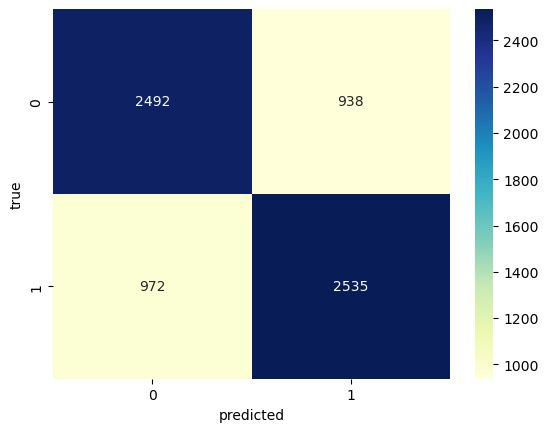

In [29]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

ROC AUC Score: 0.809


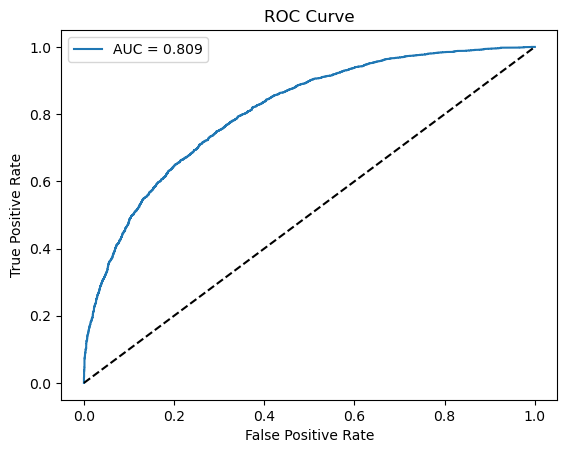

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Important features

In [31]:
features = pd.DataFrame(model.feature_importances_, index = X_teams_pro_normalized.columns)

In [32]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.179096
avg_positioning_percent_behind_ball,0.040213
avg_positioning_time_front_of_ball,0.018965
min_positioning_percent_infront_ball,0.013862
avg_positioning_avg_distance_to_ball_no_possession,0.008054
...,...
movement_avg_powerslide_duration_3,0.002282
movement_avg_speed_percentage_3,0.000000
var_positioning_percent_infront_ball,0.000000
movement_avg_speed_percentage_1,0.000000


# Model 2 ---------------------------------------

In [33]:
from xgboost import XGBClassifier
import xgboost
print(f"xgboost version: {xgboost.__version__}")
from sklearn.model_selection import cross_val_score

xgboost version: 2.1.1


In [34]:
model2 = XGBClassifier(
    n_estimators=500,
    learning_rate= 0.1,
    max_depth=7
    # early_stopping_rounds=5
    )

In [35]:
model2.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-logloss:0.66243	validation_1-logloss:0.66561
[1]	validation_0-logloss:0.63643	validation_1-logloss:0.64361
[2]	validation_0-logloss:0.61455	validation_1-logloss:0.62478
[3]	validation_0-logloss:0.59573	validation_1-logloss:0.60962
[4]	validation_0-logloss:0.57922	validation_1-logloss:0.59629
[5]	validation_0-logloss:0.56434	validation_1-logloss:0.58501
[6]	validation_0-logloss:0.55137	validation_1-logloss:0.57553
[7]	validation_0-logloss:0.53923	validation_1-logloss:0.56770
[8]	validation_0-logloss:0.52849	validation_1-logloss:0.56070
[9]	validation_0-logloss:0.51881	validation_1-logloss:0.55496
[10]	validation_0-logloss:0.51034	validation_1-logloss:0.54937
[11]	validation_0-logloss:0.50219	validation_1-logloss:0.54495
[12]	validation_0-logloss:0.49493	validation_1-logloss:0.54054
[13]	validation_0-logloss:0.48805	validation_1-logloss:0.53710
[14]	validation_0-logloss:0.48216	validation_1-logloss:0.53409
[15]	validation_0-logloss:0.47646	validation_1-logloss:0.53166
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Metrics

{'validation_0': OrderedDict([('logloss', [0.6624258373966073, 0.636427315585428, 0.6145488841370637, 0.5957310289254784, 0.5792226042793781, 0.5643360476612752, 0.5513717586260619, 0.5392323917382202, 0.5284892721978323, 0.5188121073287016, 0.5103385468683469, 0.5021947980754786, 0.49492572119241035, 0.48804835570258953, 0.4821559779707939, 0.4764570628804502, 0.47069773719092056, 0.4654610160034558, 0.4607790466715736, 0.4563767023778026, 0.45188306248257903, 0.4474739583294095, 0.44428311863681513, 0.441146612737313, 0.4369224263062909, 0.43252166649872203, 0.428957017482381, 0.4260466375970556, 0.42278440101390374, 0.42000218666364963, 0.4165459079382859, 0.413831170267054, 0.41167270618120644, 0.40824865482398137, 0.4057971197705608, 0.4023620920728087, 0.3998741404566955, 0.3979555164039082, 0.39606420322223396, 0.39300266417539703, 0.3912300437159507, 0.3887911745245094, 0.38660439310190753, 0.3852488190719909, 0.38341333948665235, 0.3815017893697749, 0.37930174607369693, 0.3767

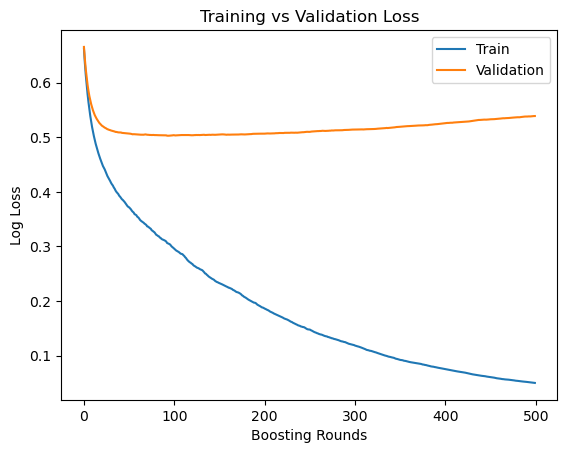

In [36]:
evals_result = model2.evals_result()

print(evals_result)

epochs = len(evals_result['validation_0']['logloss'])
plt.plot(range(epochs), evals_result['validation_0']['logloss'], label='Train')
plt.plot(range(epochs), evals_result['validation_1']['logloss'], label='Validation')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [37]:
cross_val_score(model2, X_train, y_train, cv=3, n_jobs=-1).mean()

0.733025803661525

In [38]:
y_pred2 = model2.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred2 = model2.predict(X_test)
y_pred_classes2 = y_pred2
y_test_classes2 = y_test
print("DNN Accuracy:", accuracy_score(y_test_classes2, y_pred_classes2))

DNN Accuracy: 0.7367738215366874


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("accuracy", accuracy)
print("recall", recall)
print("precision", precision)
print("f1", f1)

accuracy 0.7367738215366874
recall 0.7399486740804107
precision 0.7395269307495013
f1 0.7397377423033067


In [43]:
model2.score(X_test, y_test)

0.7367738215366874

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

       False       0.73      0.73      0.73      3430
        True       0.74      0.74      0.74      3507

    accuracy                           0.74      6937
   macro avg       0.74      0.74      0.74      6937
weighted avg       0.74      0.74      0.74      6937



### confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
print(confusion_matrix(y_test, y_pred2))

[[2516  914]
 [ 912 2595]]


[[2516  914]
 [ 912 2595]]
0.7367738215366874


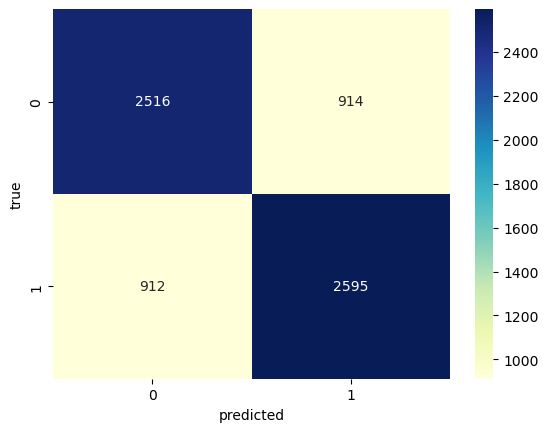

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred2)
accuracy = accuracy_score(y_test, y_pred2)
print(cm)
print(accuracy)
labels = list(y_train.keys())

s = sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt=".0f")
s.set_xlabel("predicted")
s.set_ylabel("true")
plt.show()


## ROC curve

ROC AUC Score: 0.817


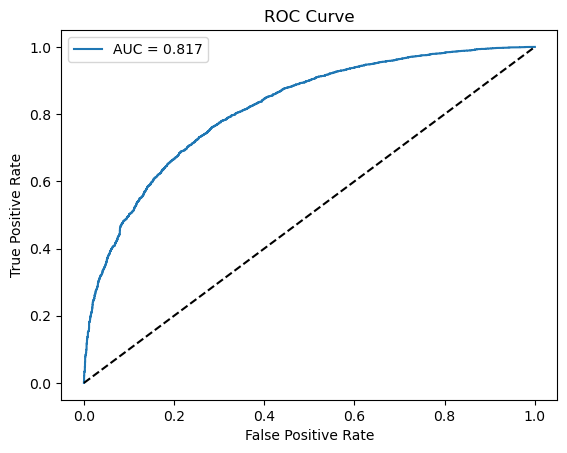

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = model2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Important features

In [50]:
features = pd.DataFrame(model2.feature_importances_, index = X_teams_pro_normalized.columns)

In [51]:
features.sort_values(0, ascending=False)

,0
avg_positioning_percent_infront_ball,0.183622
avg_positioning_percent_behind_ball,0.031167
avg_positioning_time_front_of_ball,0.016501
min_positioning_percent_infront_ball,0.006985
positioning_percent_offensive_half_1,0.006970
...,...
positioning_time_behind_ball_2,0.002936
var_positioning_percent_infront_ball,0.000789
movement_avg_speed_percentage_1,0.000000
movement_avg_speed_percentage_2,0.000000
